In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the database
Data=pd.read_csv("Rotman MMA Summer Datathon NWHL.csv")
Data.head()

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,...,Faceoff Win,100,43,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,...,Puck Recovery,107,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,...,Zone Entry,125,28,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,...,Shot,131,28,Snapshot,On Net,t,f,NaN,NaN,NaN
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,...,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN


In [3]:
Data.describe()

,Period,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,X Coordinate,Y Coordinate,X Coordinate 2,Y Coordinate 2
count,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,10679.000000,10679.000000
mean,2.010565,4.867086,4.866491,1.408005,0.998847,97.396771,42.192768,108.009739,42.119019
std,0.834753,0.357216,0.376766,1.598554,1.292165,63.188185,27.983077,59.195703,27.196254
min,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,5.000000,0.000000,0.000000,33.000000,15.000000,58.000000,17.000000
50%,2.000000,5.000000,5.000000,1.000000,1.000000,106.000000,42.000000,112.000000,42.000000
75%,3.000000,5.000000,5.000000,2.000000,1.000000,153.000000,69.000000,161.000000,67.000000
max,4.000000,6.000000,6.000000,6.000000,7.000000,200.000000,85.000000,200.000000,85.000000


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26882 entries, 0 to 26881
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_date          26882 non-null  object 
 1   Home Team          26882 non-null  object 
 2   Away Team          26882 non-null  object 
 3   Period             26882 non-null  int64  
 4   Clock              26882 non-null  object 
 5   Home Team Skaters  26882 non-null  int64  
 6   Away Team Skaters  26882 non-null  int64  
 7   Home Team Goals    26882 non-null  int64  
 8   Away Team Goals    26882 non-null  int64  
 9   Team               26882 non-null  object 
 10  Player             26882 non-null  object 
 11  Event              26882 non-null  object 
 12  X Coordinate       26882 non-null  int64  
 13  Y Coordinate       26882 non-null  int64  
 14  Detail 1           17461 non-null  object 
 15  Detail 2           1985 non-null   object 
 16  Detail 3           198

In [5]:
Data.isna().sum()

game_date                0
Home Team                0
Away Team                0
Period                   0
Clock                    0
Home Team Skaters        0
Away Team Skaters        0
Home Team Goals          0
Away Team Goals          0
Team                     0
Player                   0
Event                    0
X Coordinate             0
Y Coordinate             0
Detail 1              9421
Detail 2             24897
Detail 3             24897
Detail 4             24897
Player 2             13277
X Coordinate 2       16203
Y Coordinate 2       16203
dtype: int64

In [36]:
Data['game_id']=Data['game_date']+" "+Data['Home Team']+" vs "+Data['Away Team']
Data=pd.merge(Data,Total_shots_goals,on=['game_id','Team'])
Data

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,Player 2,X Coordinate 2,Y Coordinate 2,game_id,Goal_x,Shot_x,Goal_y,Shot_y,Goal,Shot
0,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,...,Stephanie Anderson,NaN,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,...,NaN,NaN,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,...,Maddie Rowe,NaN,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,...,NaN,NaN,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,...,Stephanie Anderson,NaN,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26877,2021-02-01,Buffalo Beauts,Boston Pride,3,0:57,4,5,1,7,Buffalo Beauts,...,NaN,NaN,NaN,2021-02-01 Buffalo Beauts vs Boston Pride,1.0,40.0,1.0,40.0,1.0,40.0
26878,2021-02-01,Buffalo Beauts,Boston Pride,3,0:30,4,5,1,7,Buffalo Beauts,...,NaN,NaN,NaN,2021-02-01 Buffalo Beauts vs Boston Pride,1.0,40.0,1.0,40.0,1.0,40.0
26879,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,...,NaN,NaN,NaN,2021-02-01 Buffalo Beauts vs Boston Pride,1.0,40.0,1.0,40.0,1.0,40.0
26880,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,...,Cassidy MacPherson,29.0,82.0,2021-02-01 Buffalo Beauts vs Boston Pride,1.0,40.0,1.0,40.0,1.0,40.0


In [67]:
Total_games1=Data.drop_duplicates(subset=['game_id','Player']).groupby('Player')[['Goal','Shot']].sum()
Total_games2=Data.groupby('Player')[['game_id']].nunique()
Total_games=pd.merge(Total_games1,Total_games2,on="Player")
Total_games=Total_games.rename(columns={'Goal':'Team Goal'})
Total_games=Total_games.rename(columns={'Shot':'Team Shot'})
Total_games

,Team Goal,Team Shot,game_id
Player,,,
Abbie Ives,8.0,274.0,4
Allie Olnowich,7.0,166.0,3
Allie Thunstrom,11.0,225.0,4
Alyson Matteau,7.0,295.0,6
Alyssa Wohlfeiler,8.0,274.0,4
...,...,...,...
Tori Howran,8.0,230.0,3
Tori Sullivan,22.0,509.0,7
Victoria Hanson,13.0,225.0,3


In [68]:
Data_grouped=Data.groupby(['Player','Event'])[['Clock']].count()
Data_grouped=Data_grouped.unstack()
Data_grouped.fillna(value=0)

Clock                                                 \
Event             Dump In/Out Faceoff Win Goal Incomplete Play Penalty Taken   
Player                                                                         
Abbie Ives                0.0         0.0  0.0             3.0           0.0   
Allie Olnowich           10.0         0.0  0.0             7.0           0.0   
Allie Thunstrom          24.0         1.0  0.0            24.0           2.0   
Alyson Matteau           20.0         0.0  0.0            49.0           1.0   
Alyssa Wohlfeiler         8.0         0.0  1.0            27.0           3.0   
...                       ...         ...  ...             ...           ...   
Tori Howran              16.0         0.0  1.0            35.0           0.0   
Tori Sullivan            10.0         1.0  0.0            16.0           0.0   
Victoria Hanson           1.0         0.0  0.0             0.0           0.0   
Whitney Dove             24.0         0.0  0.0            51.0           5.0   
Winny Brodt-Brown         4.0         0.0  1.0            20.0           2.0   

                                                                  
Event               Play Puck Recovery  Shot Takeaway Zone Entry  
Player                                                            
Abbie Ives          13.0          22.0   0.0      0.0        0.0  
Allie Olnowich      23.0          31.0  10.0      5.0        3.0  
Allie Thunstrom     45.0          57.0  28.0     14.0       32.0  
Alyson Matteau     130.0         148.0  23.0     28.0       17.0  
Alyssa Wohlfeiler   87.0          52.0  24.0      8.0       26.0  
...                  ...           ...   ...      ...        ...  
Tori Howran         74.0          90.0  13.0     13.0        9.0  
Tori Sullivan       86.0          58.0  13.0     14.0       21.0  
Victoria Hanson     12.0          12.0   0.0      1.0        0.0  
Whitney Dove       105.0         149.0  23.0     15.0       20.0  
Winny Brodt-Brown   34.0          48.0   5.0      7.0        6.0  

[126 rows x 10 columns]

In [69]:
Cal=Data_grouped['Clock'][:]
Cal=Cal.fillna(value=0)
Cal['Goal %']=Cal['Goal']/(Cal['Goal']+Cal['Shot'])
Cal=Cal.sort_values(['Goal %','Goal'],ascending=[False,False])
Cal.head(50)

Event,Dump In/Out,Faceoff Win,Goal,Incomplete Play,Penalty Taken,Play,Puck Recovery,Shot,Takeaway,Zone Entry,Goal %
Player,,,,,,,,,,,
Leila Kilduff,9.0,0.0,2.0,20.0,0.0,47.0,40.0,5.0,15.0,6.0,0.285714
Cailey Hutchison,7.0,18.0,1.0,13.0,1.0,15.0,21.0,4.0,8.0,2.0,0.200000
Winny Brodt-Brown,4.0,0.0,1.0,20.0,2.0,34.0,48.0,5.0,7.0,6.0,0.166667
Autumn MacDougall,28.0,0.0,3.0,48.0,0.0,71.0,77.0,18.0,7.0,33.0,0.142857
Haley Mack,8.0,6.0,2.0,28.0,1.0,62.0,59.0,13.0,4.0,31.0,0.133333
Audra Richards,25.0,2.0,2.0,26.0,1.0,27.0,51.0,14.0,5.0,21.0,0.125000
Rebecca Russo,12.0,2.0,1.0,18.0,0.0,41.0,45.0,7.0,5.0,9.0,0.125000
Jillian Dempsey,10.0,70.0,3.0,36.0,0.0,80.0,72.0,24.0,22.0,19.0,0.111111
Emily Janiga,8.0,17.0,1.0,19.0,1.0,30.0,36.0,8.0,13.0,14.0,0.111111


In [77]:
Final=pd.merge(Cal,Total_games, on="Player")
Final['Goal Per Game']=Final['Goal']/Final['game_id']
Final['Goal Contribution']=Final['Goal']/Final['Team Goal']
Final['Shot Contribution']=Final['Shot']/Final['Team Shot']
Final=Final.sort_values(['Goal Per Game','Goal %'],ascending=[False,False])
Final[['Goal %','Goal Per Game','Goal Contribution','Shot Contribution']].head(20)
# Mikyla Grant_Mentis has the most Goals per game, but Goal success rate is not high, 
#is it possibily because she grasp all opportunity to shoot? instead of pass to teammates who have better opportunity?
#analyze her passes, and also the total shoot made by its team, and each players shooting %, we need to bring things to a % or average level

,Goal %,Goal Per Game,Goal Contribution,Shot Contribution
Player,,,,
Mikyla Grant-Mentis,0.092593,0.833333,0.238095,0.111364
Leila Kilduff,0.285714,0.666667,0.285714,0.030120
Taylor Woods,0.086957,0.666667,0.190476,0.095455
Samantha Davis,0.105263,0.571429,0.181818,0.066798
Autumn MacDougall,0.142857,0.500000,0.428571,0.061017
Haley Mack,0.133333,0.500000,0.181818,0.057778
Audra Richards,0.125000,0.500000,0.181818,0.062222
Jillian Dempsey,0.111111,0.500000,0.142857,0.054299
Nina Rodgers,0.105263,0.500000,0.181818,0.075556


In [79]:
# Normalize the data
Final1=Final[['Goal %','Goal Per Game','Goal Contribution','Shot Contribution']]
Final1=(Final1-Final1.mean())/Final1.std()
Final1.head(20)

,Goal %,Goal Per Game,Goal Contribution,Shot Contribution
Player,,,,
Mikyla Grant-Mentis,1.107943,3.765791,2.229479,1.875649
Leila Kilduff,4.815059,2.881727,2.800621,-0.636922
Taylor Woods,0.999754,2.881727,1.658338,1.383636
Samantha Davis,1.351164,2.376548,1.554494,0.497376
Autumn MacDougall,2.072809,1.997663,4.514045,0.318599
Haley Mack,1.889992,1.997663,1.554494,0.218423
Audra Richards,1.730027,1.997663,1.554494,0.355874
Jillian Dempsey,1.463420,1.997663,1.087196,0.110825
Nina Rodgers,1.351164,1.997663,1.554494,0.768228


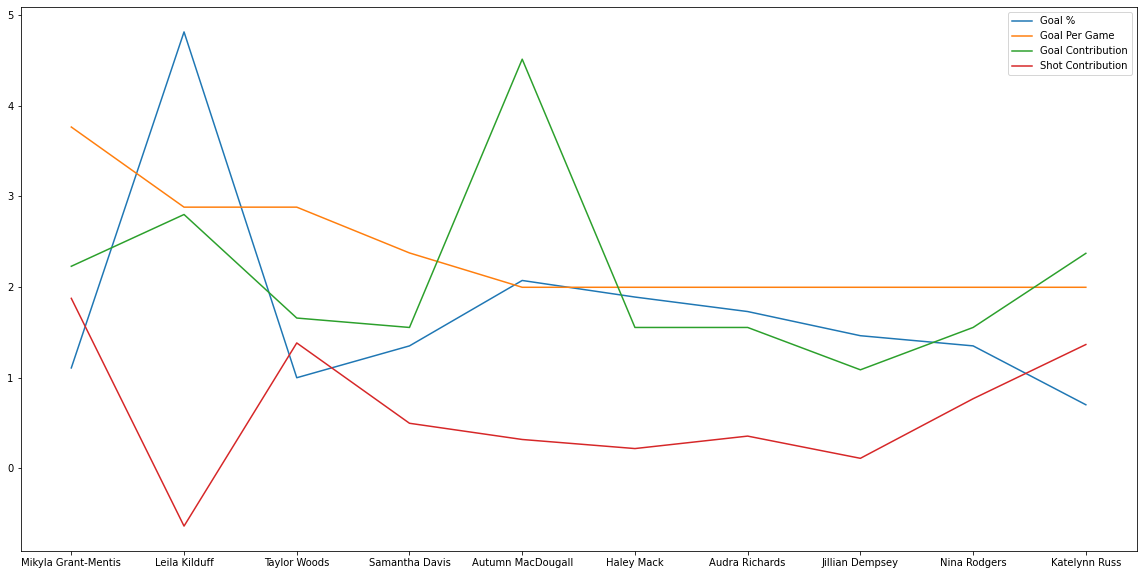

In [86]:
plt.figure(figsize=[20,10])
plt.plot(Final1[:10])
plt.legend(['Goal %','Goal Per Game','Goal Contribution','Shot Contribution'])

In [178]:
# calculating weighted score for each player
W_GPG=0.3
W_G=0.3
W_GC=0.3
W_SC=-0.3
Final1['Weighted Score']=Final['Goal %']*W_G+Final['Goal Per Game']*W_GPG+Final['Goal Contribution']*W_GC+Final['Shot Contribution']*W_SC
Final1=Final1.sort_values('Weighted Score',ascending=False)
Final1.head(20)

,Goal %,Goal Per Game,Goal Contribution,Shot Contribution,Weighted Score
Player,,,,,
Leila Kilduff,4.815059,2.881727,2.800621,-0.636922,0.362392
Mikyla Grant-Mentis,1.107943,3.765791,2.229479,1.875649,0.315797
Autumn MacDougall,2.072809,1.997663,4.514045,0.318599,0.303123
Taylor Woods,0.999754,2.881727,1.658338,1.383636,0.254593
Samantha Davis,1.351164,2.376548,1.554494,0.497376,0.237514
Haley Mack,1.889992,1.997663,1.554494,0.218423,0.227212
Audra Richards,1.730027,1.997663,1.554494,0.355874,0.223379
Katelynn Russ,0.701684,1.997663,2.372264,1.366192,0.217961
Nina Rodgers,1.351164,1.997663,1.554494,0.768228,0.213458


In [131]:
# clustering for players (cluster for shots and rank player on different clusters? or clusters directly)
net=[200,42.5]
shot_goal=Data[Data['Event'].isin(['Goal','Shot'])]
# measure the distance of each goal and shot from the net, categorize into distance ranges
shot_goal['Net Distance']=((shot_goal['X Coordinate']-net[0])**2+(shot_goal['Y Coordinate']-net[1])**2)**0.5
shot_goal
#calculate the percentage of shot and goal from each distance


<ipython-input-131-785ca5883b49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_goal['Net Distance']=((shot_goal['X Coordinate']-net[0])**2+(shot_goal['Y Coordinate']-net[1])**2)**0.5


,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,X Coordinate 2,Y Coordinate 2,game_id,Goal_x,Shot_x,Goal_y,Shot_y,Goal,Shot,Net Distance
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,...,NaN,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0,70.507092
21,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:34,5,5,0,0,Boston Pride,...,NaN,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0,35.710643
25,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:26,5,5,0,0,Boston Pride,...,NaN,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0,22.852790
65,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:18,5,5,0,0,Boston Pride,...,NaN,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0,49.246827
67,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:15,5,5,0,0,Boston Pride,...,NaN,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0,13.647344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26848,2021-02-01,Buffalo Beauts,Boston Pride,3,3:10,5,5,1,7,Buffalo Beauts,...,NaN,NaN,2021-02-01 Buffalo Beauts vs Boston Pride,1.0,40.0,1.0,40.0,1.0,40.0,27.189152
26859,2021-02-01,Buffalo Beauts,Boston Pride,3,2:25,5,5,1,7,Buffalo Beauts,...,NaN,NaN,2021-02-01 Buffalo Beauts vs Boston Pride,1.0,40.0,1.0,40.0,1.0,40.0,39.385911
26865,2021-02-01,Buffalo Beauts,Boston Pride,3,1:57,5,5,1,7,Buffalo Beauts,...,NaN,NaN,2021-02-01 Buffalo Beauts vs Boston Pride,1.0,40.0,1.0,40.0,1.0,40.0,30.103986
26867,2021-02-01,Buffalo Beauts,Boston Pride,3,1:55,5,5,1,7,Buffalo Beauts,...,NaN,NaN,2021-02-01 Buffalo Beauts vs Boston Pride,1.0,40.0,1.0,40.0,1.0,40.0,45.467021


In [132]:
shot_goal["Net Distance"] = shot_goal["Net Distance"].astype(float)

<ipython-input-132-544fc15652c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_goal["Net Distance"] = shot_goal["Net Distance"].astype(float)


In [133]:
np.quantile(shot_goal['Net Distance'],[0.25,0.5,0.75])
shot_goal['Dist Range']=">75%"
shot_goal.loc[shot_goal['Net Distance']<60.6,'Dist Range']="50%-75%"
shot_goal.loc[shot_goal['Net Distance']<43.5,'Dist Range']="25%-50%"
shot_goal.loc[shot_goal['Net Distance']<29.4,'Dist Range']="<25%"
shot_goal

<ipython-input-133-bdc87d8043c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_goal['Dist Range']=">75%"
C:\Users\86152\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\86152\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,Y Coordinate 2,game_id,Goal_x,Shot_x,Goal_y,Shot_y,Goal,Shot,Net Distance,Dist Range
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,...,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0,70.507092,>75%
21,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:34,5,5,0,0,Boston Pride,...,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0,35.710643,25%-50%
25,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:26,5,5,0,0,Boston Pride,...,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0,22.852790,<25%
65,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:18,5,5,0,0,Boston Pride,...,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0,49.246827,50%-75%
67,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:15,5,5,0,0,Boston Pride,...,NaN,2021-01-23 Minnesota Whitecaps vs Boston Pride,1.0,70.0,1.0,70.0,1.0,70.0,13.647344,<25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26848,2021-02-01,Buffalo Beauts,Boston Pride,3,3:10,5,5,1,7,Buffalo Beauts,...,NaN,2021-02-01 Buffalo Beauts vs Boston Pride,1.0,40.0,1.0,40.0,1.0,40.0,27.189152,<25%
26859,2021-02-01,Buffalo Beauts,Boston Pride,3,2:25,5,5,1,7,Buffalo Beauts,...,NaN,2021-02-01 Buffalo Beauts vs Boston Pride,1.0,40.0,1.0,40.0,1.0,40.0,39.385911,25%-50%
26865,2021-02-01,Buffalo Beauts,Boston Pride,3,1:57,5,5,1,7,Buffalo Beauts,...,NaN,2021-02-01 Buffalo Beauts vs Boston Pride,1.0,40.0,1.0,40.0,1.0,40.0,30.103986,25%-50%
26867,2021-02-01,Buffalo Beauts,Boston Pride,3,1:55,5,5,1,7,Buffalo Beauts,...,NaN,2021-02-01 Buffalo Beauts vs Boston Pride,1.0,40.0,1.0,40.0,1.0,40.0,45.467021,50%-75%


In [170]:
shot_goal_dist=shot_goal.pivot_table(index=['Player','Event'],columns='Dist Range',aggfunc='count',fill_value=0)
shot_goal_dist=shot_goal_dist['Away Team'][['<25%','25%-50%','50%-75%','>75%']]
shot_goal_dist_per=shot_goal_dist.div(shot_goal_dist.sum(axis=1),axis=0)
shot_goal_dist_per.reset_index(inplace=True)
shot_goal_dist_per

Dist Range,Player,Event,<25%,25%-50%,50%-75%,>75%
0,Allie Olnowich,Shot,0.000000,0.200000,0.300000,0.500000
1,Allie Thunstrom,Shot,0.535714,0.250000,0.178571,0.035714
2,Alyson Matteau,Shot,0.086957,0.043478,0.347826,0.521739
3,Alyssa Wohlfeiler,Goal,0.000000,1.000000,0.000000,0.000000
4,Alyssa Wohlfeiler,Shot,0.375000,0.250000,0.375000,0.000000
...,...,...,...,...,...,...
153,Tori Howran,Shot,0.000000,0.076923,0.000000,0.923077
154,Tori Sullivan,Shot,0.307692,0.230769,0.307692,0.153846
155,Whitney Dove,Shot,0.043478,0.086957,0.347826,0.521739
156,Winny Brodt-Brown,Goal,1.000000,0.000000,0.000000,0.000000


In [175]:
shot_goal_dist_per1=shot_goal_dist_per[shot_goal_dist_per['Event']=='Goal']
shot_goal_dist_per1=shot_goal_dist_per1.rename(columns={'<25%':'Goal<25%'})
shot_goal_dist_per1=shot_goal_dist_per1.rename(columns={'25%-50%':'Goal 25%-50%'})
shot_goal_dist_per1=shot_goal_dist_per1.rename(columns={'50%-75%':'Goal 50%-75%'})
shot_goal_dist_per1=shot_goal_dist_per1.rename(columns={'>75%':'Goal>75%'})
shot_goal_dist_per2=shot_goal_dist_per1[['Player','Goal<25%','Goal 25%-50%','Goal 50%-75%','Goal>75%']]
shot_goal_dist_per2

Dist Range,Player,Goal<25%,Goal 25%-50%,Goal 50%-75%,Goal>75%
3,Alyssa Wohlfeiler,0.000000,1.000000,0.000000,0.000000
5,Amanda Conway,1.000000,0.000000,0.000000,0.000000
7,Amy Curlew,1.000000,0.000000,0.000000,0.000000
9,Audra Richards,0.500000,0.500000,0.000000,0.000000
11,Autumn MacDougall,1.000000,0.000000,0.000000,0.000000
13,Breanne Wilson-Bennett,0.500000,0.500000,0.000000,0.000000
17,Brooke Boquist,1.000000,0.000000,0.000000,0.000000
20,Cailey Hutchison,0.000000,0.000000,1.000000,0.000000
25,Christina Putigna,1.000000,0.000000,0.000000,0.000000
29,Emily Fluke,1.000000,0.000000,0.000000,0.000000


In [179]:
Final2=pd.merge(Final1,shot_goal_dist_per2,on="Player")
Final2.head(20)

,Player,Goal %,Goal Per Game,Goal Contribution,Shot Contribution,Weighted Score,Goal<25%,Goal 25%-50%,Goal 50%-75%,Goal>75%
0,Leila Kilduff,4.815059,2.881727,2.800621,-0.636922,0.362392,0.000000,0.000000,0.500000,0.500000
1,Mikyla Grant-Mentis,1.107943,3.765791,2.229479,1.875649,0.315797,0.800000,0.200000,0.000000,0.000000
2,Autumn MacDougall,2.072809,1.997663,4.514045,0.318599,0.303123,1.000000,0.000000,0.000000,0.000000
3,Taylor Woods,0.999754,2.881727,1.658338,1.383636,0.254593,0.500000,0.250000,0.000000,0.250000
4,Samantha Davis,1.351164,2.376548,1.554494,0.497376,0.237514,0.500000,0.250000,0.250000,0.000000
5,Haley Mack,1.889992,1.997663,1.554494,0.218423,0.227212,0.500000,0.500000,0.000000,0.000000
6,Audra Richards,1.730027,1.997663,1.554494,0.355874,0.223379,0.500000,0.500000,0.000000,0.000000
7,Katelynn Russ,0.701684,1.997663,2.372264,1.366192,0.217961,1.000000,0.000000,0.000000,0.000000
8,Nina Rodgers,1.351164,1.997663,1.554494,0.768228,0.213458,0.500000,0.500000,0.000000,0.000000
9,Lisa Chesson,1.250134,1.113600,3.371762,0.337987,0.211507,1.000000,0.000000,0.000000,0.000000


In [ ]:
# another approach:
# step1: cluster players by distribution of total shot_attempts and goals
# step2: use metrics to find out the best player within each cluster

<AxesSubplot:xlabel='X Coordinate', ylabel='Y Coordinate'>

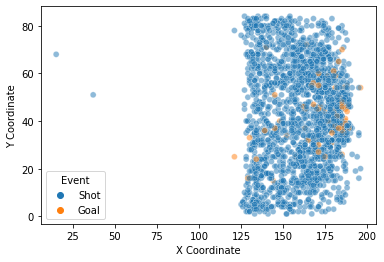

In [98]:
sns.scatterplot(x='X Coordinate',y='Y Coordinate',hue='Event',data=shot_goal,alpha=0.5)

In [99]:
shot_goal_uni=shot_goal[shot_goal['Event']=='Goal']['Player'].unique()

<ipython-input-100-f7d31020695d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


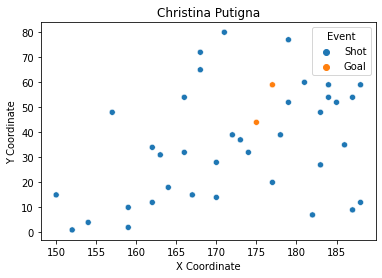

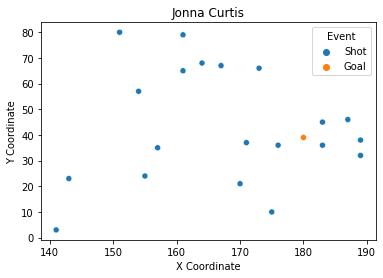

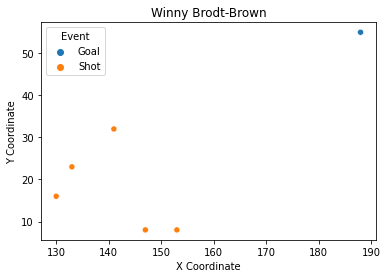

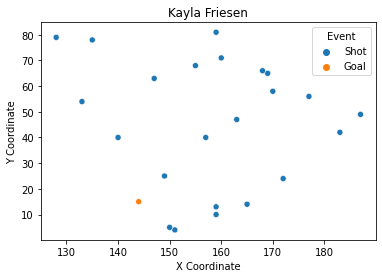

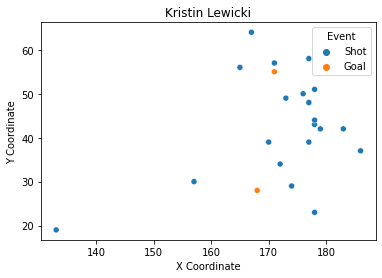

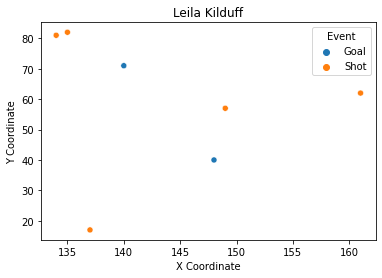

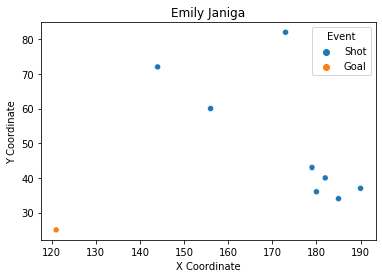

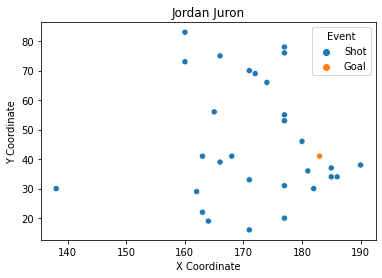

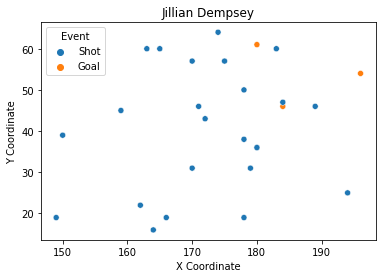

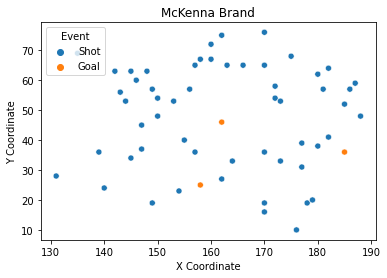

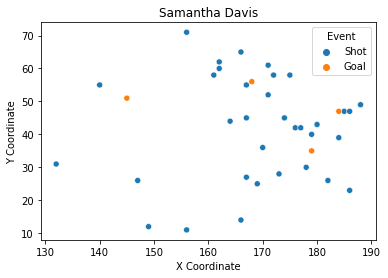

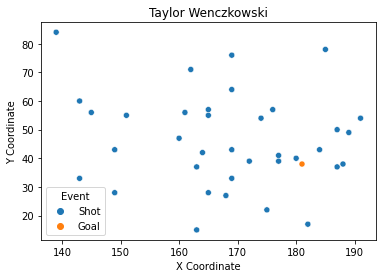

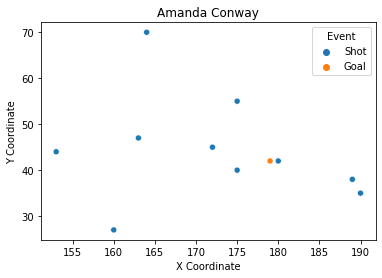

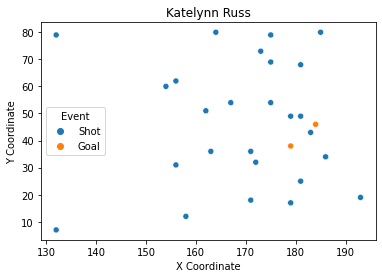

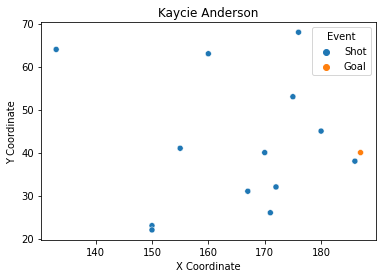

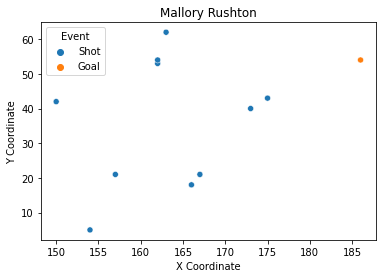

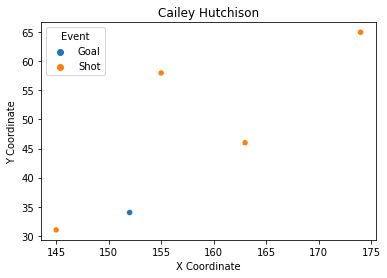

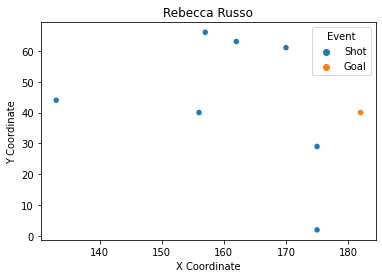

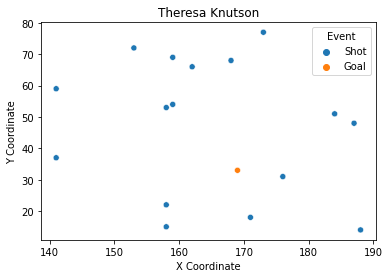

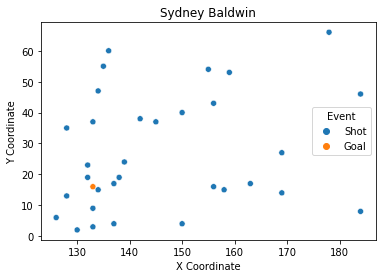

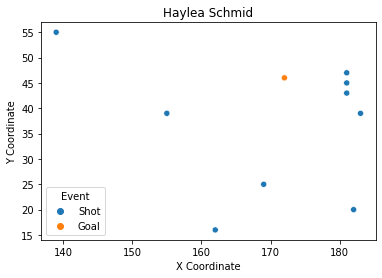

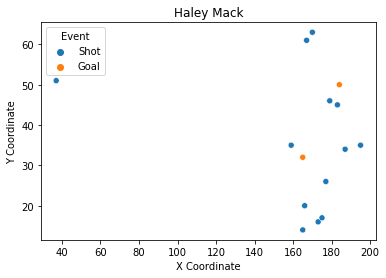

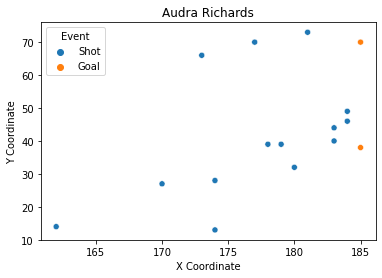

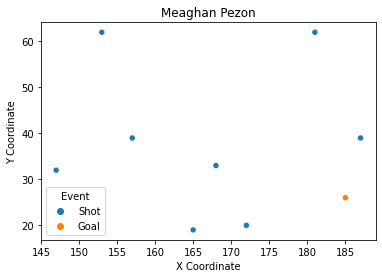

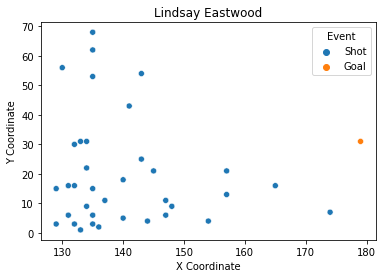

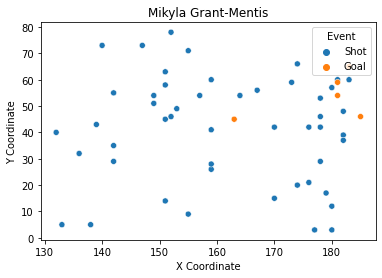

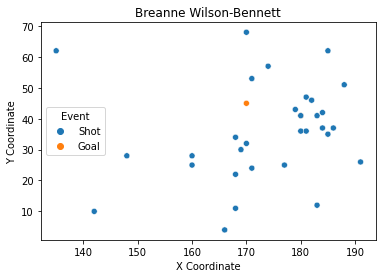

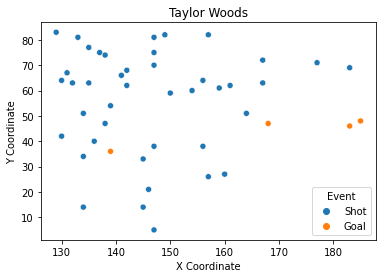

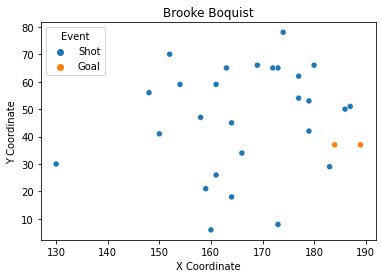

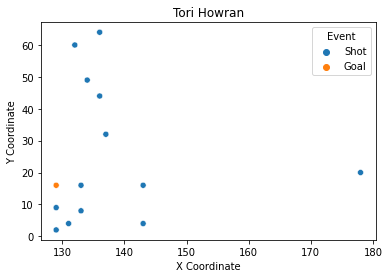

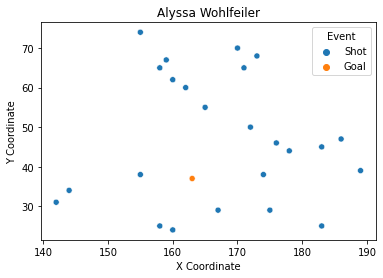

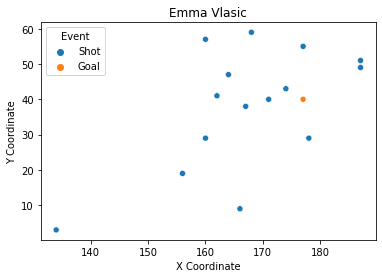

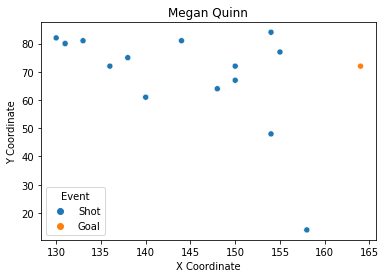

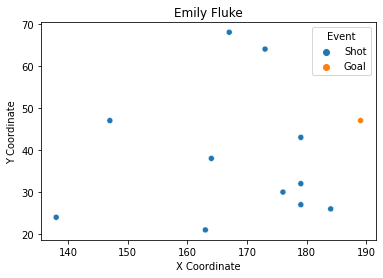

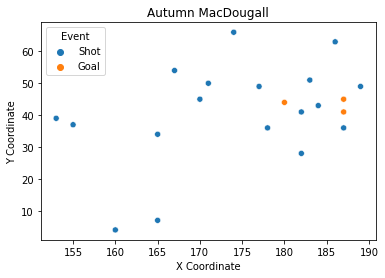

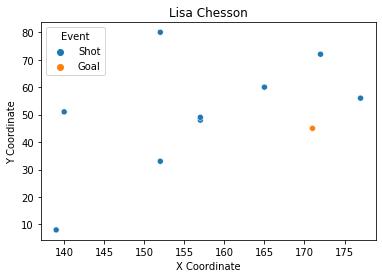

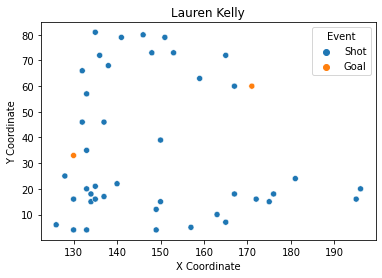

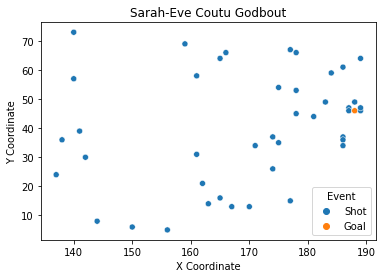

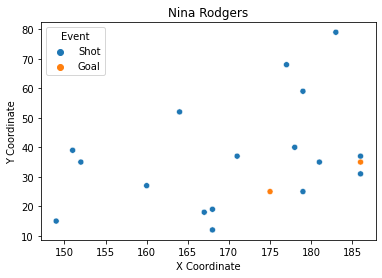

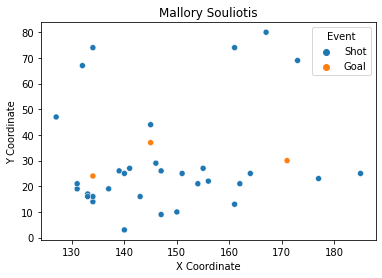

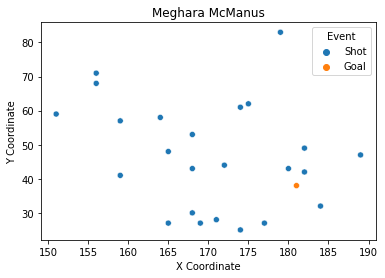

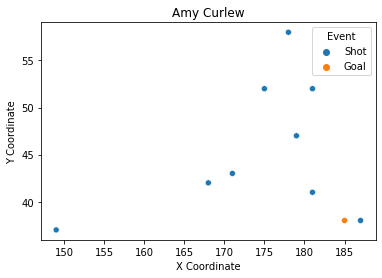

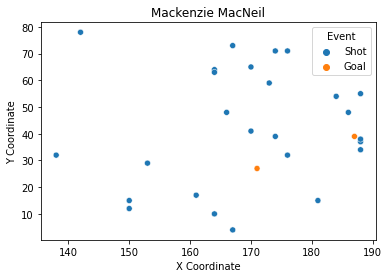

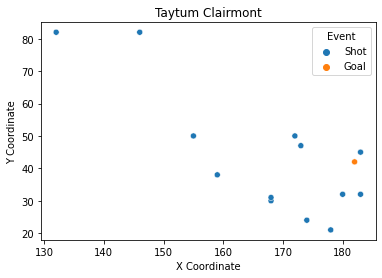

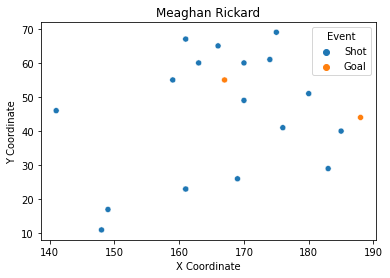

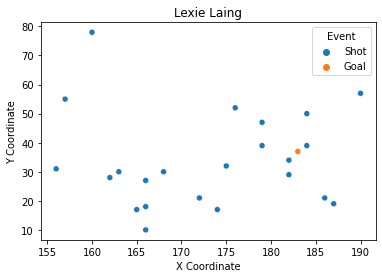

In [100]:
for i in shot_goal_uni:
    plt.figure()
    shot_goal_ind=shot_goal[shot_goal['Player']==i]
    sns.scatterplot(x='X Coordinate',y='Y Coordinate',hue='Event',data=shot_goal_ind)
    plt.title(i)